1. Сейчас порог отсечения для первичных клиентов (1 займ) по скорингу 200, при этом уровень просрочки 30+ (дней) составляет 22,3%. Какой порог отсечения необходимо поставить чтобы добиться уровня просрочки 30+ равным 14%.
Используйте шаг скорингового балла = 50
Поясните целесообразность этотого шага.
Визуализируйте ответ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('Тест_для_кандидата_риск_аналитик.xlsx', sheet_name=1)

In [3]:
score_point = [200]
cut_off = [22.3]

In [4]:
while min(cut_off) > 14:
    
    score_point.append(max(score_point)+50)

    first_loan = df[(df['Скоринговый балл Скиба']>=max(score_point)) &\
                       (df['Какой по счету займ у клиента']==1)]['ID займа'].count()

    days_delay = df[(df['Скоринговый балл Скиба']>=max(score_point)) &\
                       (df['Какой по счету займ у клиента']==1) &\
                       (df['Итоговое дней просрочки']>=30)]['ID займа'].count()

    cut_off.append((days_delay/first_loan)*100)

In [5]:
print('Скоринговый балл: '+str(max(score_point))+'\nУровень просрочки: '+str(min(cut_off)))  

Скоринговый балл: 350
Уровень просрочки: 13.953488372093023


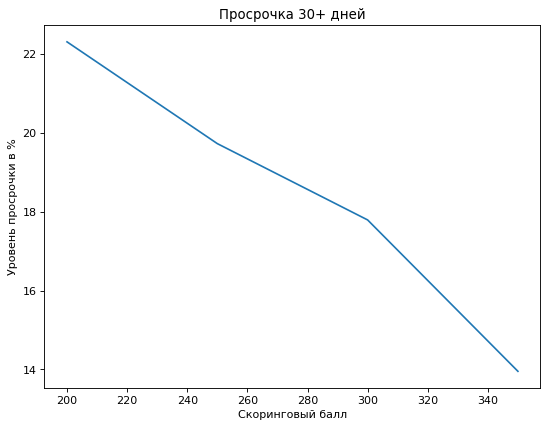

In [6]:
%matplotlib inline

plt.figure( figsize=(8, 6), dpi=80 )

plt.plot( score_point, cut_off) 

plt.xlabel('Скоринговый балл') 
plt.ylabel('Уровень просрочки в %')
plt.title('Просрочка 30+ дней');

2. Найти способ снизить просрочку 90+ (дней) по всем категориям займов более чем на 70%
Визуализируйте ответ

In [7]:
df.head()

,ID займа,id верификатора,"Статус займа (4 - закрыт, 3 не выплачен)",Дата выдачи займа,Дата закрытия,Какой по счету займ у клиента,Количество продлений срока погашения по этому займу,Возраст,"Пол (0 - м, 1-ж)",Количество детей,Скоринговый балл Скиба,Регион проживания,Регион паспорт,Дата погашения,Итоговое дней просрочки,Наличие просрочки ЖКХ,Наличие просрочки по кредитным картам,Наличие неоплаченных штрафов ГИБДД,Наличие производства в ФССП
0,1,3,3,2019-09-24 14:37:56,NaT,3,1,32.424658,0,1,183,Самарская обл.,Самарская обл.,2019-11-19,115,1.0,NaN,1.0,NaN
1,2,20,4,2019-09-24 15:08:01,2019-10-06 16:54:28,4,0,39.734247,1,2,222,Московская обл.,Московская обл.,2019-10-06,0,NaN,NaN,NaN,1.0
2,3,3,4,2019-09-24 15:16:11,2019-11-13 19:16:09,10,0,43.509589,1,1,422,Курская обл.,Курская обл.,2019-10-23,21,NaN,1.0,NaN,NaN
3,4,97,4,2019-09-24 15:25:08,2019-10-02 15:02:18,1,0,30.695890,1,1,142,Мурманская обл.,Мурманская обл.,2019-10-02,0,NaN,1.0,NaN,1.0
4,5,97,4,2019-09-24 15:35:12,2019-10-29 10:44:37,1,0,37.002740,0,2,441,Краснодарский край,Краснодарский край,2019-10-24,5,NaN,1.0,1.0,NaN


In [8]:
df_delay_90 = df[(df['Итоговое дней просрочки']>=90)][['id верификатора',\
                                                       'Скоринговый балл Скиба',\
                                                       'Какой по счету займ у клиента',\
                                                       'Количество детей',\
                                                       'Наличие просрочки ЖКХ',\
                                                       'Наличие просрочки по кредитным картам',\
                                                       'Наличие неоплаченных штрафов ГИБДД',\
                                                       'Наличие производства в ФССП']].fillna(0)
df_delay_90.count()

id верификатора                          1010
Скоринговый балл Скиба                   1010
Какой по счету займ у клиента            1010
Количество детей                         1010
Наличие просрочки ЖКХ                    1010
Наличие просрочки по кредитным картам    1010
Наличие неоплаченных штрафов ГИБДД       1010
Наличие производства в ФССП              1010
dtype: int64

In [9]:
df_delay_90_new = df[(df['Итоговое дней просрочки']>=90)&\
                     (df['Какой по счету займ у клиента']>=3)&\
                     (df['Скоринговый балл Скиба']>=100)].fillna(0)

(df_delay_90_new['id верификатора'].count()/df_delay_90['id верификатора'].count())*100

29.207920792079207

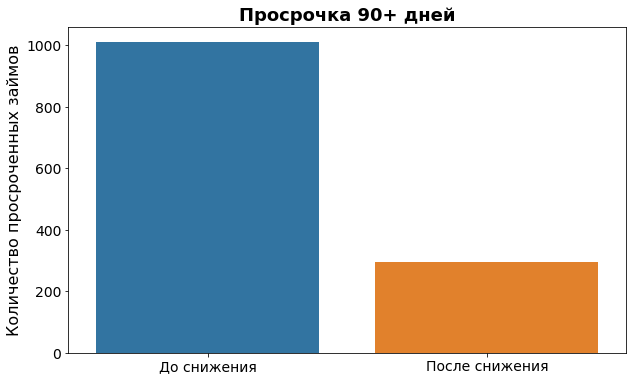

In [10]:
%matplotlib inline

plt.figure(figsize=(10,6))
plt.title("Просрочка 90+ дней", fontsize=18, fontweight='bold')
plt.ylabel("Количество просроченных займов", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(x=['До снижения','После снижения'],\
            y=[df_delay_90['id верификатора'].count(), df_delay_90_new['id верификатора'].count()]);



3. Какие еще переменные из выгрузки, кроме скорингового балла, наиболее коррелируют с возвратностью первичных займов (1 займ). Визуализируйте ответ

In [11]:
df_3 = df[(df['Какой по счету займ у клиента']==1)].fillna(0)
df_3.reset_index(drop=True, inplace=True)

In [12]:
status = df_3['Статус займа (4 - закрыт, 3 не выплачен)']
num_list = []
for i in df_3.columns.drop(['ID займа','id верификатора', 'Скоринговый балл Скиба',\
                          'Какой по счету займ у клиента', 'Статус займа (4 - закрыт, 3 не выплачен)']):
    if isinstance(df_3[i][0], (int,float,np.int64,np.float64)) == True:
        num_list.append(i)
num_list

['Количество продлений срока погашения по этому займу',
 'Возраст',
 'Пол (0 - м, 1-ж)',
 'Количество детей',
 'Итоговое дней просрочки',
 'Наличие просрочки ЖКХ',
 'Наличие просрочки по кредитным картам',
 'Наличие неоплаченных штрафов ГИБДД',
 'Наличие производства в ФССП']

In [13]:
df_first_loan = pd.DataFrame(index=['Возвратность первичных займов'],columns=num_list)

for i in num_list:
    df_first_loan[i][0] = abs(df_3[num_list][i].corr(status))              # делаем корреляцию каждого столбца со статусом

df_first_loan   

,Количество продлений срока погашения по этому займу,Возраст,"Пол (0 - м, 1-ж)",Количество детей,Итоговое дней просрочки,Наличие просрочки ЖКХ,Наличие просрочки по кредитным картам,Наличие неоплаченных штрафов ГИБДД,Наличие производства в ФССП
Возвратность первичных займов,0.0485434,0.0380787,0.00234158,0.0190462,0.825024,0.696879,0.113417,0.0521163,0.00775703


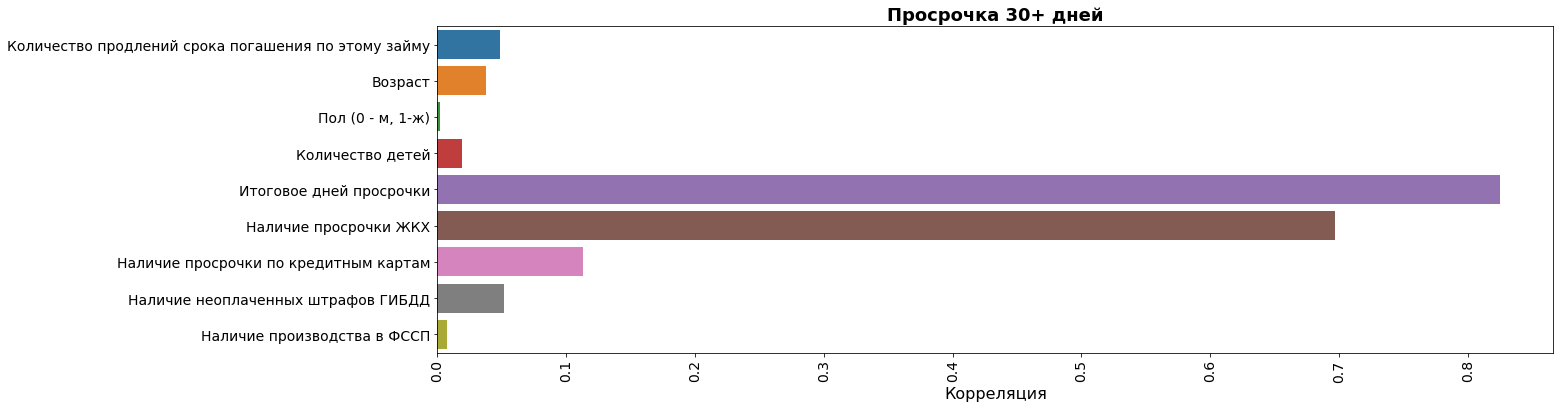

In [14]:
%matplotlib inline

plt.figure(figsize=(20,6))
plt.title("Просрочка 30+ дней", fontsize=18, fontweight='bold')
plt.xlabel("Корреляция", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
sns.barplot(x=list(df_first_loan.values[0]),\
            y=df_first_loan.columns);
